In [1]:
import cx_Oracle
import matplotlib.pyplot as plt

# Philosophy
Let's put it all together!

This assignment is meant to give you some experience with using code to work with a database. It is also an opportunity to use all of the knowledge we have learned so far to see how the various topics from our class fit together.

# Step 1: Pick a `.sql` file and transfer it to the UBC CS server

For this assignment, we have given you a choice of two topics (the choices are listed in the Canvas assignment). Pick your favourite and download the file to your computer.

In the SQLPlus tutorial, you transferred a `.sql` file full of `CREATE TABLE` and `INSERT` statements to the CS server so that you can run it in Oracle. You will want to do the same thing with the `.sql` file you have just downloaded. If you run into a space issue, you may have to delete the existing tables in your database by following the instructions on the [course website](https://www.students.cs.ubc.ca/~cs-368/resources/sql-plus-setup.html#commands).

<font color="blue">POKEMON SQL FILE</font>

# Step 2: To tunnel or not to tunnel. That is the question.
### The answer is yes. You need to tunnel.

The Oracle database is hosted on a protected department machine. We first saw this in action when we used SQLPlus to access the database; before being able to connect to the server with SQLPlus, we had to first SSH into the UBC CS servers. 

When you are using code to access the server, we have to do a similar process to first access the UBC CS servers before connecting to the database via code. Depending on what you are using to write code, these instructions may differ (i.e., [Syzygy](https://www.students.cs.ubc.ca/~cs-368/resources/connecting-to-db.html#syzygy) vs. a [local installation of Jupyter on your own machine](https://www.students.cs.ubc.ca/~cs-368/resources/connecting-to-db.html#local)).

You cannot skip this step. You will not be able to connect to the database if you do.

In [2]:
cx_Oracle.init_oracle_client(lib_dir=r"E:\downloads\instantclient_21_9")

In [3]:
# We are using a global variable here to hold the connection to the database to make the rest of
# the questions easier.
# Disclaimer: This is not the best in terms of security.

# TODO: Fill in your username and password below. As a reminder, 
# your username is "ora_CWL" (no quotation marks) and your password is "a[student_number]" where
# [student_number] is replaced with your actual student number (e.g., a12345678)

DSN = cx_Oracle.makedsn("localhost", 1522, service_name="stu")
CONNECTION = cx_Oracle.connect(user="ora_agill59", password="a51913747", dsn=DSN, encoding="UTF-8")

# Step 3: Query the database

Now that we can connect to the database, it's time to start writing some code so that we can execute some queries.

If you are running into trouble, try these two resources:
* https://cx-oracle.readthedocs.io/en/latest/user_guide/connection_handling.html
* https://cx-oracle.readthedocs.io/en/latest/user_guide/sql_execution.html
* https://oracle.github.io/python-cx_Oracle/samples/tutorial/Python-and-Oracle-Database-Scripting-for-the-Future.html#binding

If you are running into trouble with Jupyter not recognizing the cx_oracle library, please double check to ensure that it is installed.

In [4]:
Cursor = CONNECTION.cursor()

# Step 4: Think of a Query
In this assignment, we will ask you to query the database and then visualize the result of your query in some way. For example, if we were working with some relations that contained data about book sales over time, we could create a bar graph showing the total book sales per month.

Here are the requirements for your query:
* It has to use an aggregate operator
* It has to use GROUP BY
* It must be "complete" as in the client (your code in this assignment) should not have to further manipulate the data after the query has returned. That is, your query should pull in the data in a way that does not require you to further group/prune/sort it.

Here are the requirements for your visualization:
* It does not have to be fancy nor does it have to be dynamic. A simple line graph or bar chart will suffice.
* The visualization has to make sense sense given what your query is trying to find/express.
* The visualization should have a title/legend/axes labels when appropriate.

# Step 4a: Write an English description of the query

In the cell below, write an English description of your query. Do **not** describe how the query works. I.e., we do not want a description like "First we will find the rows with this value and then we will take the first value from this list and add it etc.".

Imagine you are trying to describe this query to a five year old child. What is the query meant to do?

<font color="blue">Finds the number of pokemon in each primary type. </font>

# Step 4b: State the SQL query
In the cell below, write the SQL query.

<font color="blue">SELECT count(ptype_primary), ptype_primary
FROM pokemons
GROUP BY ptype_primary</font>

# Step 5: Execute your query and fetch the result

Write a function that will execute your query and return the results of that query. 

In a previous assignment, we briefly mentioned the issue of SQL injection (the [XKCD comic about Bobby Tables](https://xkcd.com/327/)). SQL injection is when someone uses an opportunity for user input to run their own query. It is considered very dangerous to directly concatenate whatever a user gives you.

To get around the issue of directly executing anything that a user provides, we use [bind variables](https://cx-oracle.readthedocs.io/en/latest/user_guide/bind.html). In your function, you won't necessarily have user input (and thus can trust the query) so using bind variables is not totally necessary. However, we want you to get a bit of experience with doing this so we would like your code to use bind variables when executing your query. For an example on how this is done, please refer to section 4.1 on [this page](https://oracle.github.io/python-cx_Oracle/samples/tutorial/Python-and-Oracle-Database-Scripting-for-the-Future.html#binding).

If you are stuck on how to do this, please read this [page](https://cx-oracle.readthedocs.io/en/latest/user_guide/sql_execution.html).

In [5]:

query = '''
SELECT count(ptype_primary), ptype_primary
FROM pokemons
GROUP BY ptype_primary
Order BY count(ptype_primary) desc
'''

<font color="blue">I am unsure on how to add a bind variable for such a simple query.</font>

In [6]:
# Write your solution to step 5 here
data = []
for row in Cursor.execute(query):
    print(row)
    data.append(row)

(46, 'Water')
(37, 'Normal')
(22, 'Bug')
(21, 'Grass')
(20, 'Fire')
(15, 'Poison')
(15, 'Electric')
(14, 'Psychic')
(13, 'Rock')
(11, 'Ground')
(9, 'Fighting')
(7, 'Fairy')
(6, 'Ice')
(5, 'Dark')
(4, 'Ghost')
(3, 'Dragon')
(2, 'Steel')


In [7]:
poke_types = [item[1] for item in data]
poke_types

['Water',
 'Normal',
 'Bug',
 'Grass',
 'Fire',
 'Poison',
 'Electric',
 'Psychic',
 'Rock',
 'Ground',
 'Fighting',
 'Fairy',
 'Ice',
 'Dark',
 'Ghost',
 'Dragon',
 'Steel']

In [8]:
poke_count = [item[0] for item in data]
poke_count

[46, 37, 22, 21, 20, 15, 15, 14, 13, 11, 9, 7, 6, 5, 4, 3, 2]

# Step 6: Create your visualization
Using your solution from step 5, create your visualization. Again, this visualization does not have to be fancy.

Feel free to refer to the [matplotlib examples](https://matplotlib.org/stable/gallery/index). If you use code from the examples, be sure to cite it by leaving a comment to identify which lines of code were taken from the example.

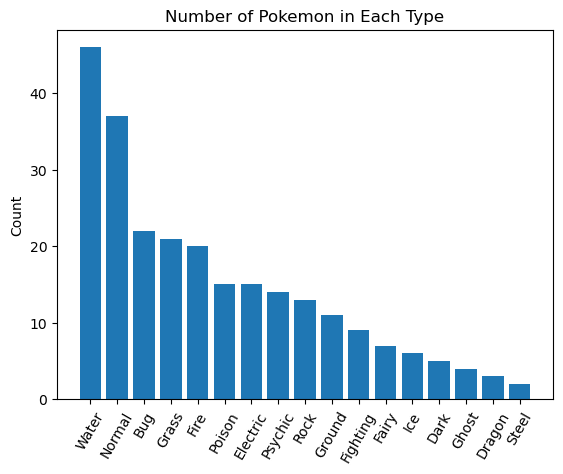

In [9]:
plt.bar(x = poke_types, height = poke_count)
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.title('Number of Pokemon in Each Type')
plt.show()

# Step 7: Submit your work!
Please submit your work by downloading the notebook (File -> Download As -> Notebook (.ipynb)).